<a href="https://colab.research.google.com/github/GuilhermeDuarte14511/CodigoEstudo/blob/master/AtividadeCi%C3%AAncia_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manipulação dos Dados

In [ ]:
import pandas as pd

#Visualização

In [ ]:
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression


#Machine Learning


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("/content/energy_efficiency_data.csv")

In [ ]:
data

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
data.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [ ]:
data.shape

(768, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Checar se os valores vão ser ausentes

In [ ]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

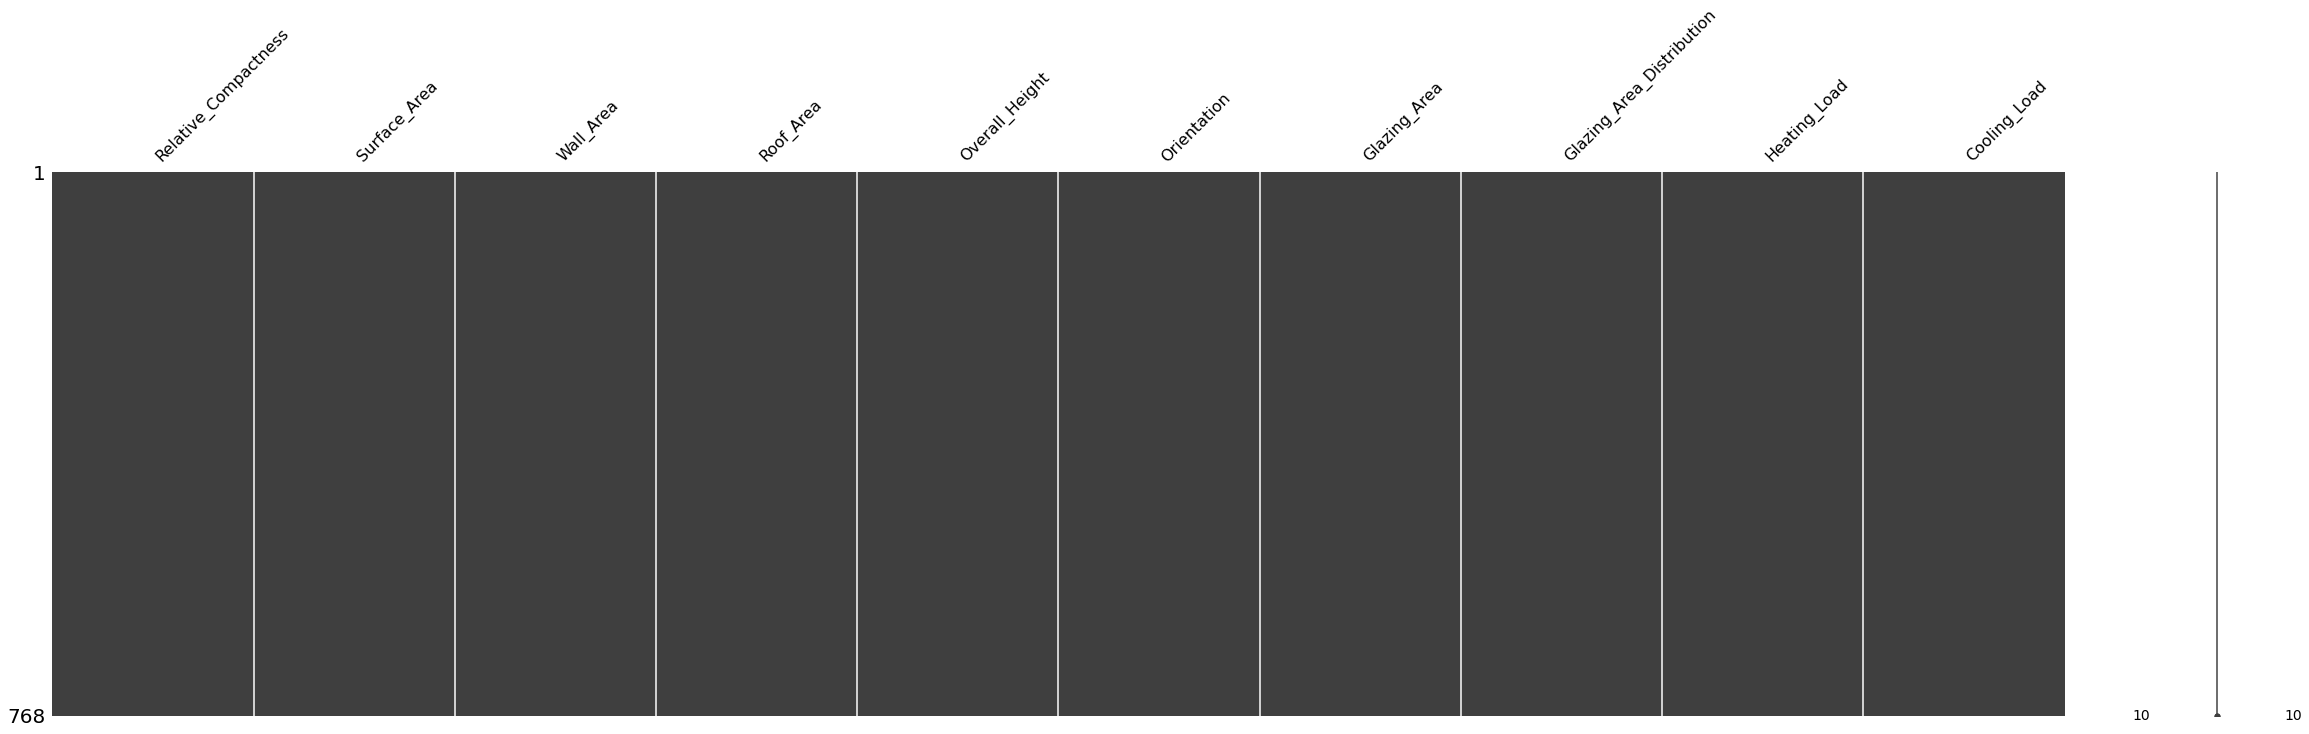

In [ ]:
missingno.matrix(data, figsize = (40,10))

Representação Por Grafico

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeb8617510>,
      dtype=object)

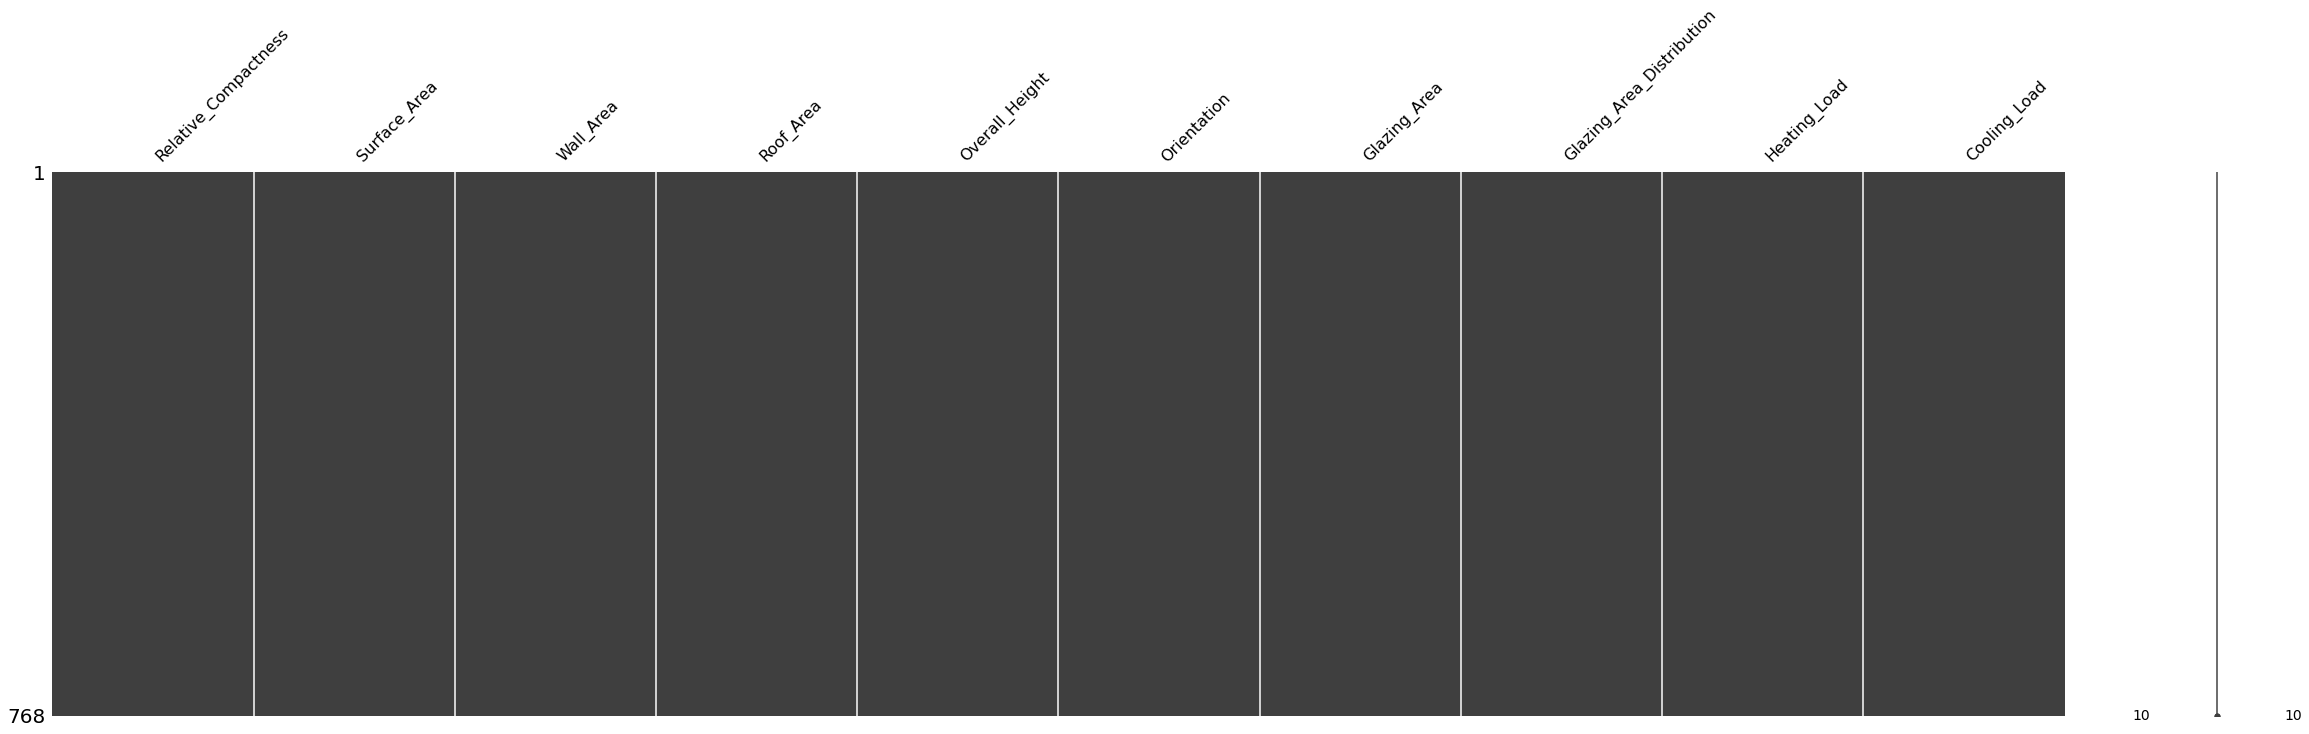

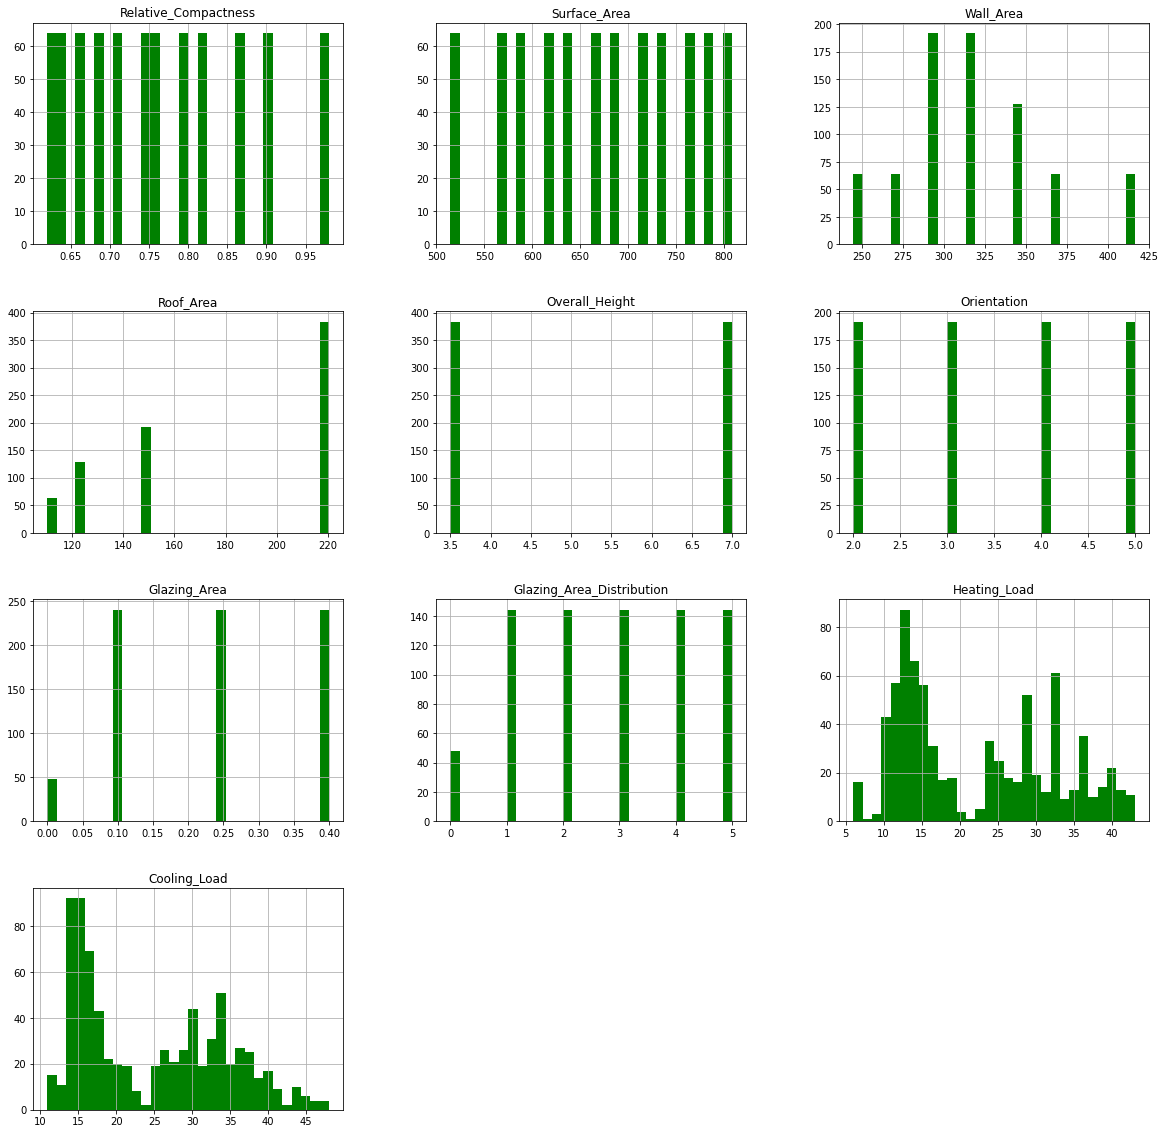

In [ ]:
missingno.matrix(data, figsize = (40,10))

data.hist(bins = 30, figsize = (20,20), color = 'green')

Foi feito o rename de todas as colunas, segue exemplo de como feito com uma

In [ ]:
data.rename(columns={'Cooling_Load':'Refrigeração_Carga'},inplace=True)

In [ ]:
data.rename(columns={'Relative_Compactness':'Compactação_relativa'},inplace=True)

In [ ]:
data.rename(columns={'Surface_Area':'Área_da_superfície'},inplace=True)

In [ ]:
data.rename(columns={'Wall_Area':'Área_da_parede'},inplace=True)

In [ ]:
data.rename(columns={'Roof_Area':'Área_telhado'},inplace=True)

In [ ]:
data.rename(columns={'Overall_Height':'Altura total '},inplace=True)

In [ ]:
data.rename(columns={'Orientation':'0rientação'},inplace=True)

In [ ]:
data.rename(columns={'Glazing_Area':'Área_envidraçada'},inplace=True)

In [ ]:
data.rename(columns={'Glazing_Area_Distribution':'Distribuição_da_área_envidraçada'},inplace=True)

In [ ]:
data.rename(columns={'Heating_Load':'Aquecimento_Carga'},inplace=True)

In [ ]:
data.rename(columns={'Cooling_Load':'Refrigeração_Carga'},inplace=True)

Colunas com Novos nomes

In [ ]:
data.columns

Index(['Compactação_relativa', 'Área_da_superfície', 'Área_da_parede',
       'Área_telhado', 'Altura total ', '0rientação', 'Área_envidraçada',
       'Distribuição_da_área_envidraçada', 'Aquecimento_Carga',
       'Refrigeração_Carga'],
      dtype='object')

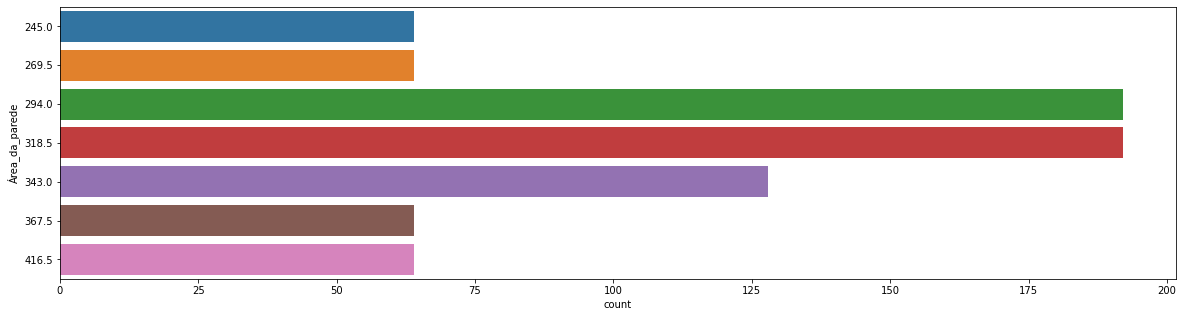

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='Área_da_parede', data=data)

In [ ]:
data['Área_da_parede'].value_counts()

294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Área_da_parede, dtype: int64

Agora vamos fazer a correlação de pearson

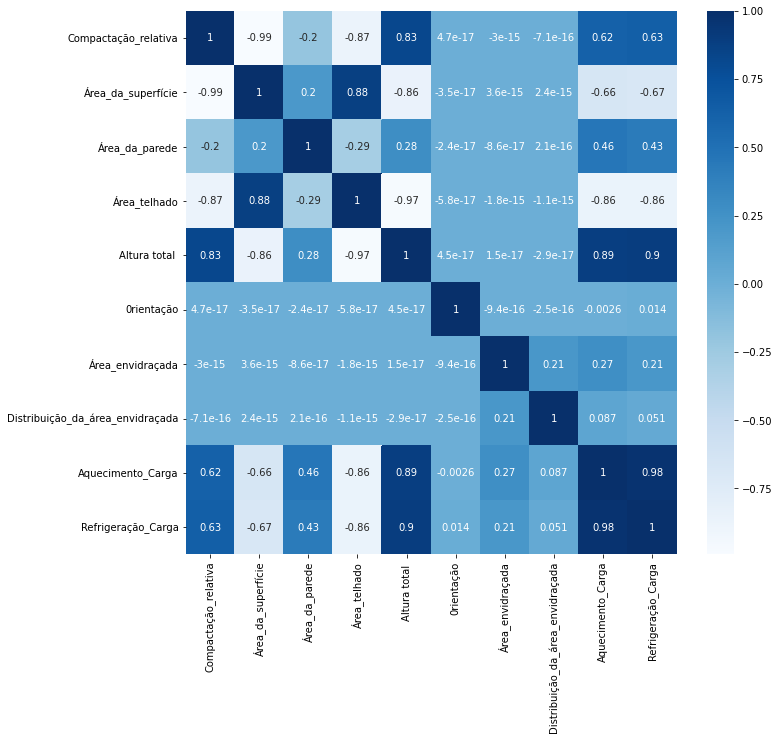

In [ ]:
plt.figure(figsize=(11,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

Correlação da área de parece com o aquecimento da 
carga

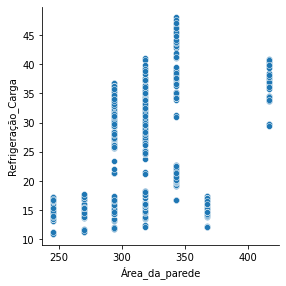

In [ ]:

sns.pairplot(data, x_vars=['Área_da_parede'], y_vars=['Refrigeração_Carga'], height=4, kind='scatter')

In [ ]:
X = data['Área_da_parede']

In [ ]:
y = data['Refrigeração_Carga']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=100)

In [ ]:
X_train.head()

155    294.0
150    318.5
78     269.5
9      294.0
142    367.5
Name: Área_da_parede, dtype: float64

In [ ]:
y_train.head()

155    27.40
150    30.08
78     13.87
9      21.97
142    14.27
Name: Refrigeração_Carga, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_sm

,const,Área_da_parede
155,1.0,294.0
150,1.0,318.5
78,1.0,269.5
9,1.0,294.0
142,1.0,367.5
...,...,...
578,1.0,294.0
53,1.0,318.5
350,1.0,318.5
79,1.0,269.5


In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const            -5.609775
Área_da_parede    0.094200
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Refrigeração_Carga   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 19 May 2022   Prob (F-statistic):           2.99e-25
Time:                        17:55:43   Log-Likelihood:                -1925.5
No. Observations:                 537   AIC:                             3855.
Df Residuals:                     535   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.6098      2.786     -2.013      0.045     -11.083      -0.136
Área_da_parede     0.0942      0.009     10.933      0.000       0.077       0.111
==============================================================================
Omnibus:                       62.069   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.495
Skew:                           0.255   Prob(JB):                     1.30e-05
Kurtosis:                       2.137   Cond. No.                     2.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_equacao = 0.0942 * X_train + -5.6098	

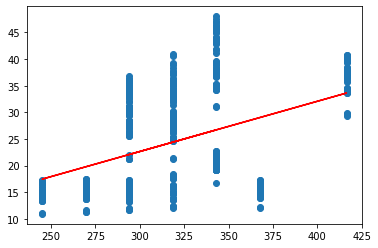

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_equacao, 'r')

In [ ]:
X_train.head()

155    294.0
150    318.5
78     269.5
9      294.0
142    367.5
Name: Área_da_parede, dtype: float64

In [ ]:
y_train.head()

155    27.40
150    30.08
78     13.87
9      21.97
142    14.27
Name: Refrigeração_Carga, dtype: float64

In [ ]:

print(f'Área da parede: {len(X_train)}')
print(f'refrigeração da carga: {len(X_test)}')

Área da parede: 537
refrigeração da carga: 231


In [ ]:
# Tamanho do DataFrame
print(f'tamanho do dataframe: {len(data)}')

tamanho do dataframe: 768


In [ ]:
if (len(data) == (len(X_train)+ len(X_test))):
  print('Tamanho OK')
else:
    print('Tamanho diferente')

Tamanho OK


In [ ]:
model = LinearRegression()

In [ ]:
type(X_train)


pandas.core.series.Series

In [ ]:
data.head(10)

,Compactação_relativa,Área_da_superfície,Área_da_parede,Área_telhado,Altura total,0rientação,Área_envidraçada,Distribuição_da_área_envidraçada,Aquecimento_Carga,Refrigeração_Carga
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97
